<a href="https://colab.research.google.com/github/subhan0rizwan/getting-hands-dirty-pytorch/blob/main/training_basic_linear_nn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
from math import inf
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
 url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
 my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
my_df["variety"] = my_df["variety"].replace('Setosa', 0.0)

my_df["variety"] = my_df["variety"].replace('Versicolor', 1.0)

my_df["variety"] = my_df["variety"].replace('Virginica', 2.0)

/tmp/ipython-input-2615769293.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["variety"] = my_df["variety"].replace('Virginica', 2.0)


In [ ]:
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

X = X.values
y = y.values


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [ ]:
# CrossEntropyLoss is a standard loss function used in machine learning and deep learning, primarily for classification tasks
# ts main purpose is to measure the performance of a classification model by quantifying the difference
# between the predicted probability distribution and the actual label distribution


criteria = nn.CrossEntropyLoss()

# optimizers are algorithms that adjust model parameters (weights and biases) to minimize the prediction error (loss function) during training

# The Adam (Adaptive Moment Estimation) optimizer in PyTorch is implemented as the torch.optim.Adam class.
# It is a popular and efficient algorithm that combines the concepts of momentum and adaptive learning rates,
# making it a strong default choice for many deep learning tasks

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
epochs = 1000
losses = []

# Loop over the number of epochs (complete passes through the training data)
for i in range(epochs):
  # Perform a forward pass: predict the target variable (y_pred) using the current model parameters and the input data (X_train)
  y_pred = model.forward(X_train)

  # Calculate the loss: measure the difference between the model's predictions (y_pred) and the actual target values (y_train)
  loss = criteria(y_pred, y_train)

  # Store the current loss value for plotting or analysis later, detaching it from the computation graph and converting to a NumPy array
  losses.append(loss.detach().numpy())

  # Print the epoch number and the loss value every 10 epochs to monitor training progress
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Zero the gradients: clear previous gradients before the backward pass to prevent accumulation across iterations
  optimizer.zero_grad()

  # Perform a backward pass (backpropagation): compute the gradient of the loss with respect to all model parameters
  loss.backward()

  # Update the weights: adjust the model parameters using the computed gradients to minimize the loss
  optimizer.step()

Epoch: 0 and loss: 0.00016773118113633245
Epoch: 10 and loss: 0.00016552599845454097
Epoch: 20 and loss: 0.00016335911641363055
Epoch: 30 and loss: 0.0001612216728972271
Epoch: 40 and loss: 0.0001591186155565083
Epoch: 50 and loss: 0.0001570489548612386
Epoch: 60 and loss: 0.0001550107408547774
Epoch: 70 and loss: 0.000153004948515445
Epoch: 80 and loss: 0.00015102961333468556
Epoch: 90 and loss: 0.0001490857539465651
Epoch: 100 and loss: 0.00014717136218678206
Epoch: 110 and loss: 0.00014529241889249533
Epoch: 120 and loss: 0.0001434380392311141
Epoch: 130 and loss: 0.00014161514991428703
Epoch: 140 and loss: 0.00013981682423036546
Epoch: 150 and loss: 0.00013804504123982042
Epoch: 160 and loss: 0.00013630278408527374
Epoch: 170 and loss: 0.00013458811736200005
Epoch: 180 and loss: 0.00013289802882354707
Epoch: 190 and loss: 0.00013123253302183002
Epoch: 200 and loss: 0.00012959560262970626
Epoch: 210 and loss: 0.00012797834642697126
Epoch: 220 and loss: 0.000126388666103594
Epoch: 23

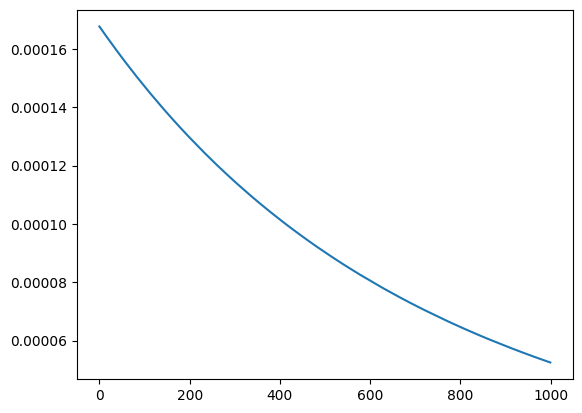

In [ ]:
#visualising the training performance

plt.plot(range(epochs), losses)

In [ ]:
with torch.no_grad():
  y_eval = model.forward(X_test)

  loss = criteria(y_eval, y_test)

In [ ]:
loss

tensor(1.2244)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}), {str(y_val)}, \t{y_test[i]}')


1), tensor([-19.7121,  -8.0075,  30.0073]), 	2
2), tensor([-27.2717, -19.9500,  49.5633]), 	2
3), tensor([-31.2308, -21.6794,  55.5239]), 	2
4), tensor([ 19.7704,  41.2714, -36.8411]), 	1
5), tensor([-25.7136, -14.8698,  42.9229]), 	2
6), tensor([ 35.2682,  56.1024, -58.2794]), 	1
7), tensor([-16.2677,  -2.5562,  23.8722]), 	2
8), tensor([ 20.9629,  42.5079, -38.5977]), 	1
9), tensor([-22.9518, -10.7678,  35.9369]), 	2
10), tensor([-29.1737, -21.5422,  53.1784]), 	2
11), tensor([-10.6593,   4.1222,  14.3446]), 	2
12), tensor([ 163.0987,  145.5835, -211.1814]), 	0
13), tensor([ 148.2403,  132.1284, -191.8435]), 	0
14), tensor([ 43.3559,  58.3710, -66.3951]), 	1
15), tensor([ 143.1691,  130.3721, -186.8101]), 	0
16), tensor([-2.4174, 14.6532,  0.2057]), 	2
17), tensor([ 149.7252,  134.2637, -194.2129]), 	0
18), tensor([-14.4864,  -1.2448,  21.0394]), 	1
19), tensor([ 171.4122,  151.4134, -221.0630]), 	0
20), tensor([ 129.2208,  117.7137, -168.6416]), 	0
21), tensor([ 41.0183,  58.9481, -